# The Sparks Foundation
GRIP ( Graduate Rotational Internship Program) April 2024

#### By Aditya Kumar Gupta

# Data Science And Business Analytics
                 

#### Task 1 
Prediction using Supervised ML

# Problem Statement
• Predict the percentage of an student based on the no. of study hours.

• This is a simple linear regression task as it involves just 2 variables. 


• What will be predicted score if a student studies for 9.25 hrs/ day? 

In [57]:
# Importing the required libraries.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics  

import warnings
warnings.filterwarnings("ignore")

In [58]:
# Load the data
data_url = "http://bit.ly/w-data"
data = pd.read_csv(data_url)

In [59]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Cleaning and Understanding the dataset.

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [76]:
# Checking for the null values.
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [77]:
# Descriptive analysis of the Dataset.
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Average Hours Studied = 5.0120

Average Scores Obtained = 51.4800

In [78]:
# Checking correlation 
correlation = data.corr()
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


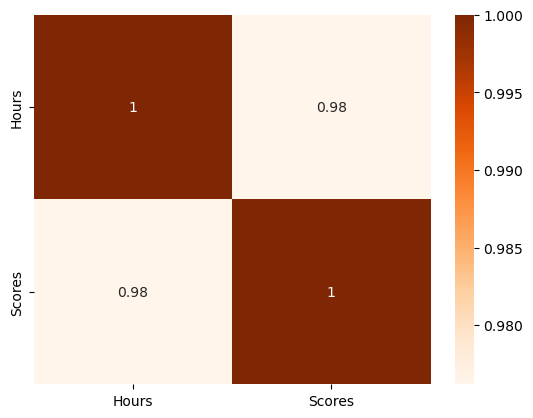

In [79]:
sns.heatmap(correlation,xticklabels =correlation.columns, yticklabels = correlation.columns, annot = True, cmap = 'Oranges')
plt.show()

We can infer from the heat map above that there is a strong positive correlation between the number of hours studied and the score achieved.

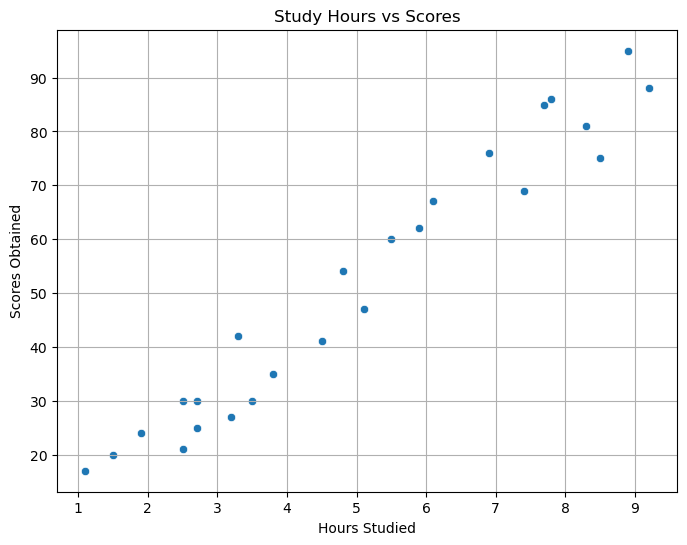

In [80]:
# Plotting the distribution of scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours', y='Scores', data=data)
plt.title('Study Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.grid(True)
plt.show()


We can infer from the following graph that there is a significantly positive linear relationship between the percentage of score and the amount of hours studied.

In [65]:
# Split the data into features (hours) and target (scores)
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

# Identifying independent and dependent variable. 

Independent Variable :- Hours

Dependent Variable  :-  Scores

In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
# Fit the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

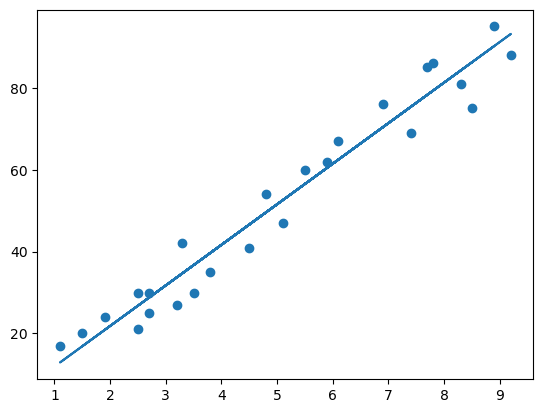

In [68]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [69]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [70]:
# Making predictions
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Comparing.

In [71]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [56]:
# Predict the score for 9.25 hours/day
hours = [[9.25]]
predicted_score = regressor.predict(hours)
print("Predicted score for 9.25 hours/day of study:", predicted_score[0])


Predicted score for 9.25 hours/day of study: 93.69173248737538


<b>Conclusion :- </b>If student studies 9.25 hrs/day than the score will be  <b> 93.69 

# Evaluating the model.

In [81]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:' ,mae)

Mean Squared Error: 21.5987693072174
Mean Absolute Error: 4.183859899002975
